## Prodigy Internship by Mahalakshmi

## Task 3 : Decision Tree Classifier

## Problem Statement
### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("bank-additional.csv",delimiter=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.rename(columns={'y':'deposit'}, inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
data.shape

(4119, 21)

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [11]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [12]:
data.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## Data Cleaning

In [14]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

## Extracting Numerical and Categorical Columns

In [15]:
numerical_cols = data.select_dtypes(exclude='object').columns
print(numerical_cols)

categorical_cols = data.select_dtypes(include='object').columns
print(categorical_cols)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')


## Statistical analysis

In [16]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


## Outliers

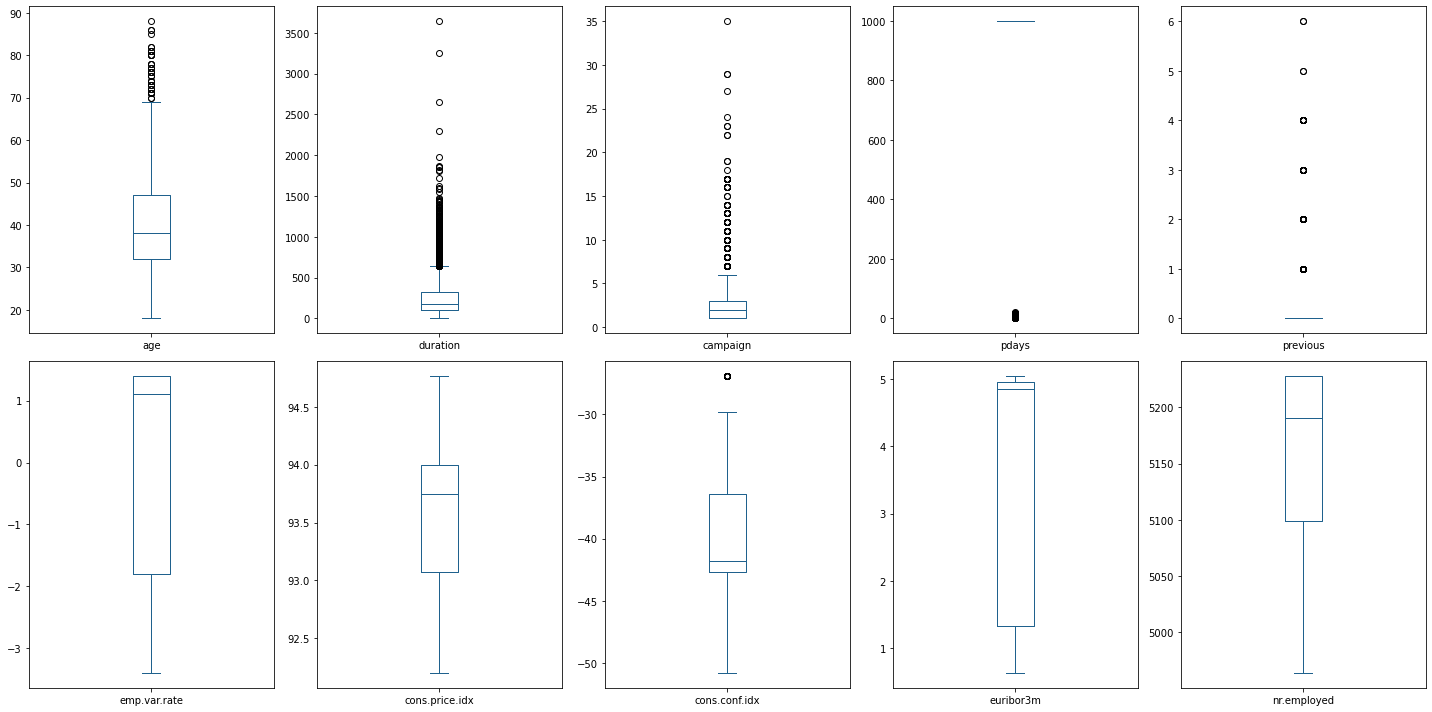

In [18]:
# Selecting only numerical columns
numerical_cols = data.select_dtypes(include=['number'])

# Creating box plots for each column
numerical_cols.plot(kind='box', subplots=True, layout=(2, 5), figsize=(20, 10), color='#1F618D')
plt.tight_layout()
plt.show()

In [19]:
# Defining the remove_outliers function
def remove_outliers(col):
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col >= lower_bound) & (col <= upper_bound)]

# Applying the function to all numerical columns
data[numerical_cols.columns] = data[numerical_cols.columns].apply(remove_outliers)

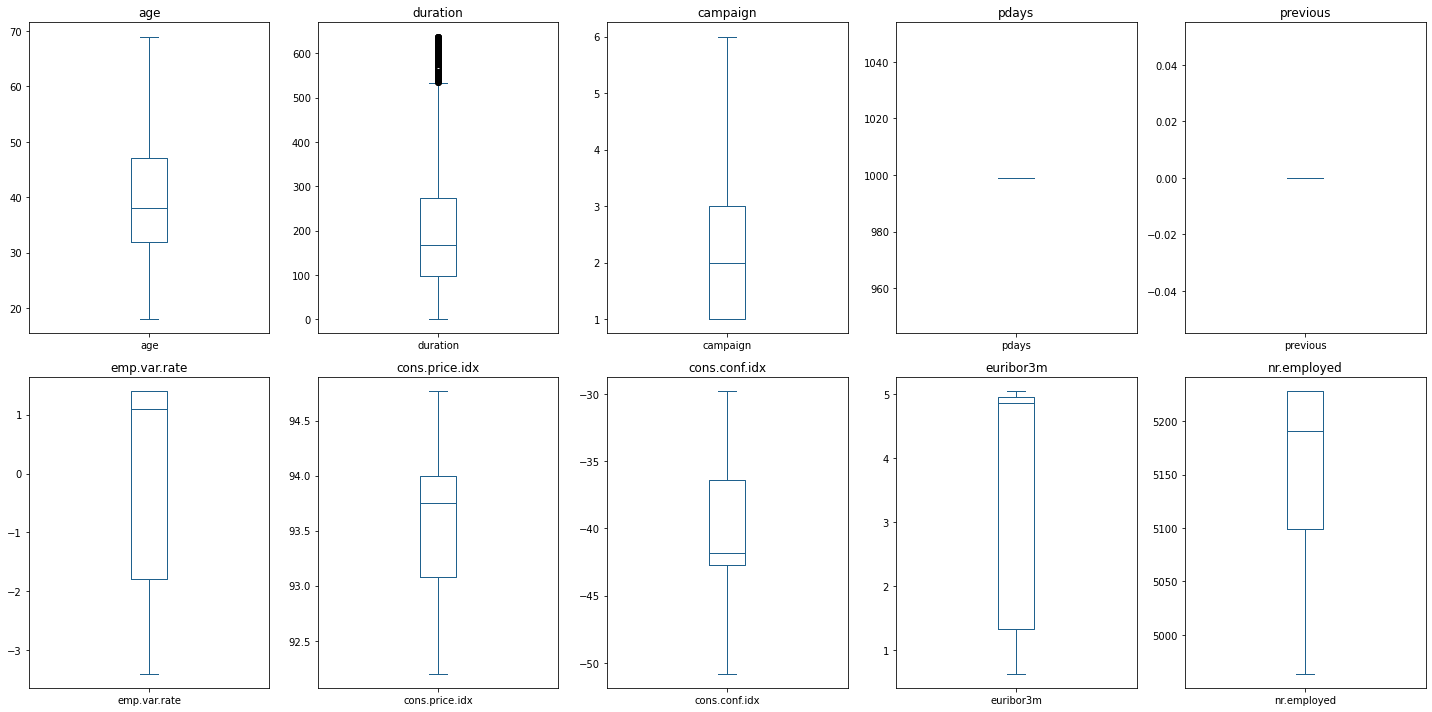

In [22]:
#Plotting boxplot after removing outliers
# Selecting only numerical columns
numerical_cols = data.select_dtypes(include=['number'])

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Creating box plots for each column
for i, col in enumerate(numerical_cols):
    data[col].plot(kind='box', ax=axes[i], color='#1F618D')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Correlation

                     age  duration  campaign  pdays  previous  emp.var.rate  \
age             1.000000  0.014927  0.002965    NaN       NaN      0.031497   
duration        0.014927  1.000000 -0.080353    NaN       NaN     -0.059701   
campaign        0.002965 -0.080353  1.000000    NaN       NaN      0.123057   
pdays                NaN       NaN       NaN    NaN       NaN           NaN   
previous             NaN       NaN       NaN    NaN       NaN           NaN   
emp.var.rate    0.031497 -0.059701  0.123057    NaN       NaN      1.000000   
cons.price.idx  0.015600  0.000265  0.103550    NaN       NaN      0.755155   
cons.conf.idx   0.082703 -0.027461  0.000790    NaN       NaN      0.285392   
euribor3m       0.041180 -0.072888  0.106661    NaN       NaN      0.970308   
nr.employed     0.027887 -0.088785  0.107557    NaN       NaN      0.897173   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                   0.015600       0.082703   0.041180  

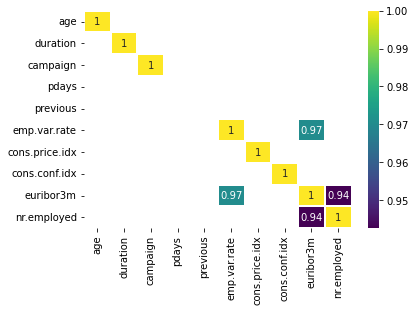

In [26]:
corr = data.corr()
print(corr)
corr = corr[abs(corr) >= 0.9]
sns.heatmap(corr, annot=True, cmap='viridis', linewidth=0.2)
plt.show()

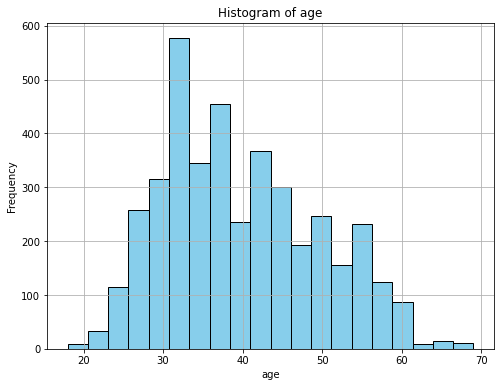

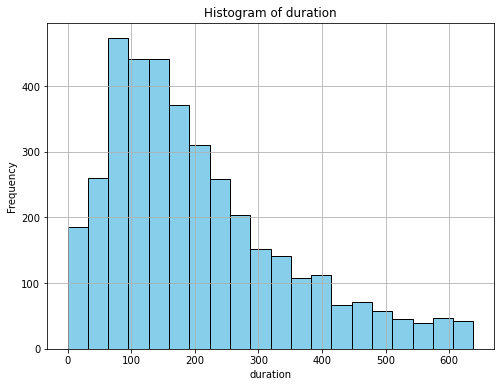

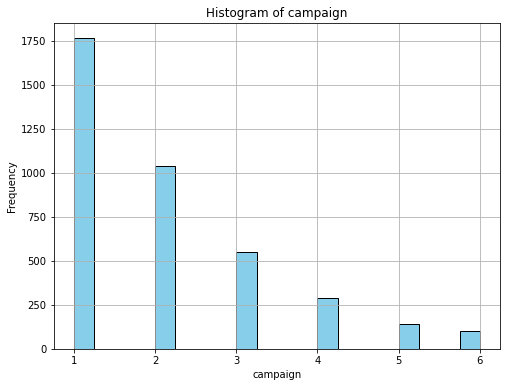

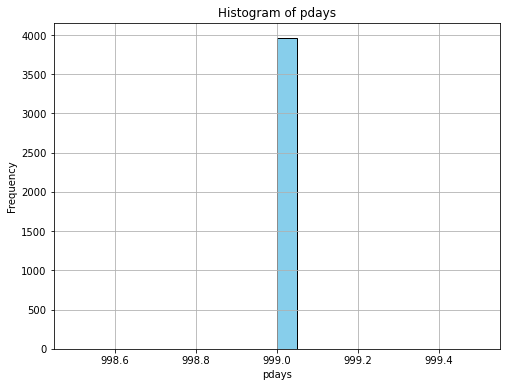

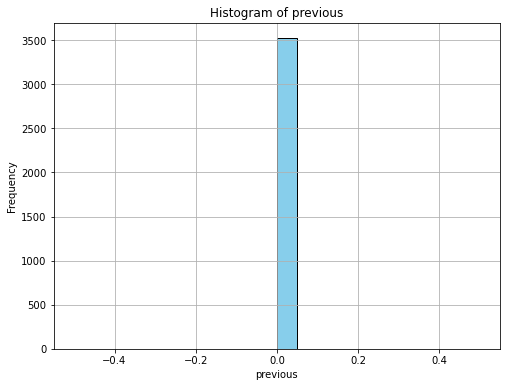

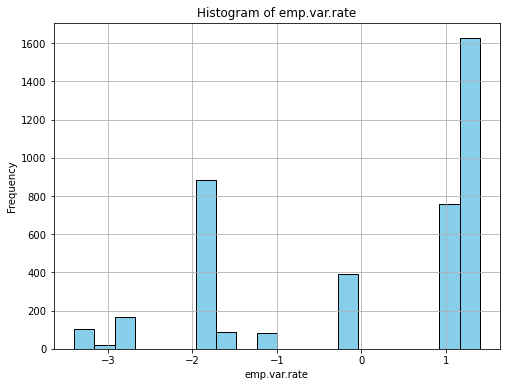

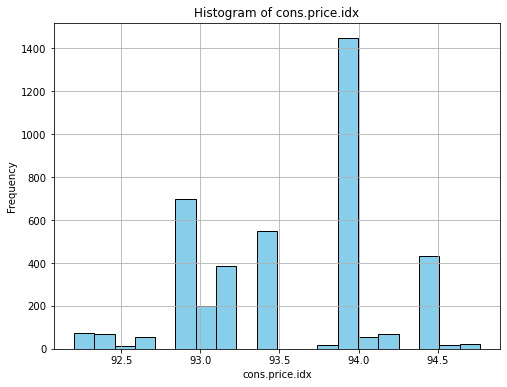

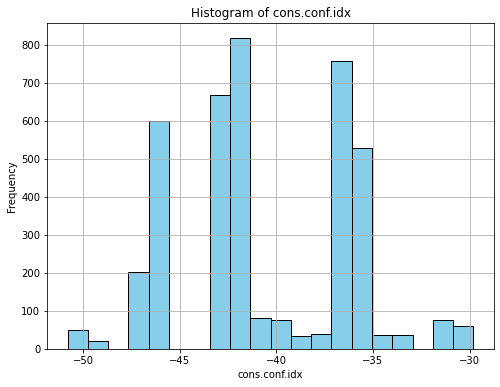

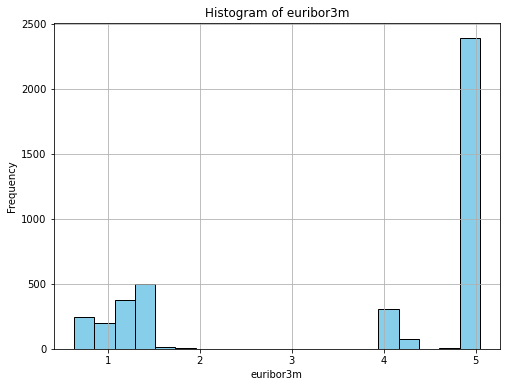

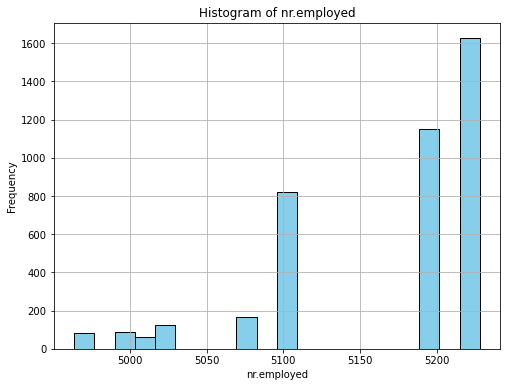

In [31]:
# Set the number of bins for the histograms
num_bins = 20

# Create histograms for each numerical column
for column in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=num_bins, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()

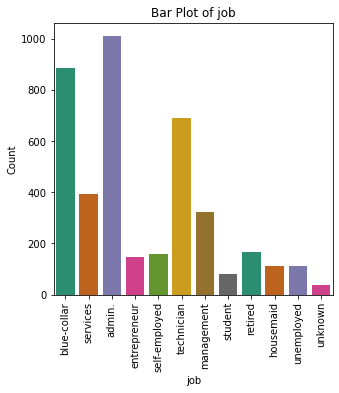

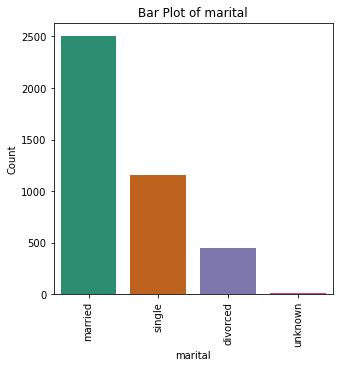

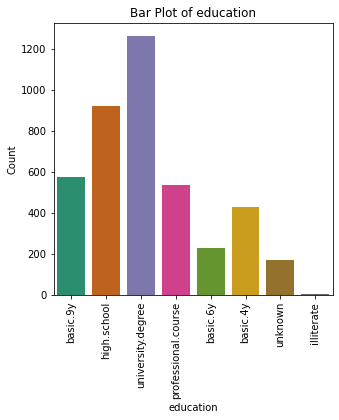

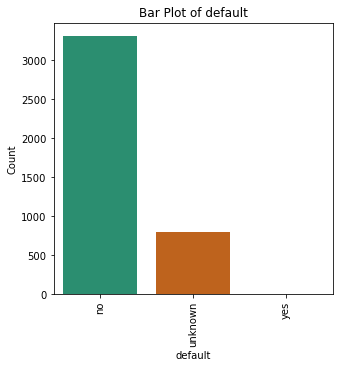

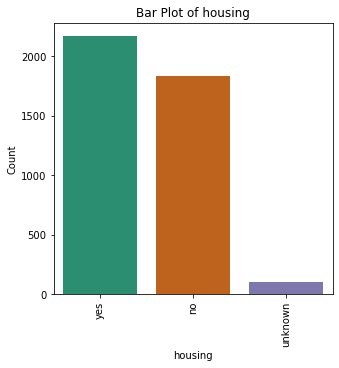

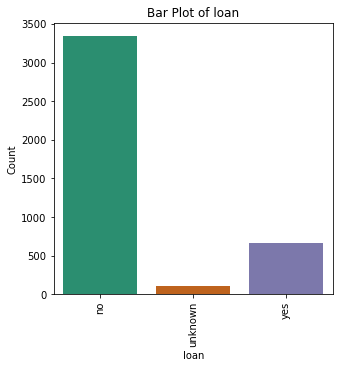

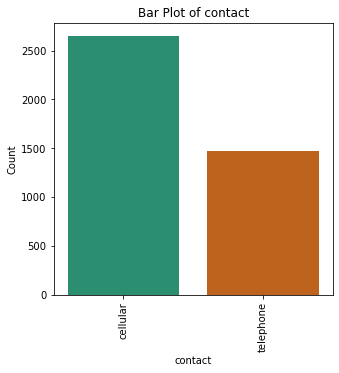

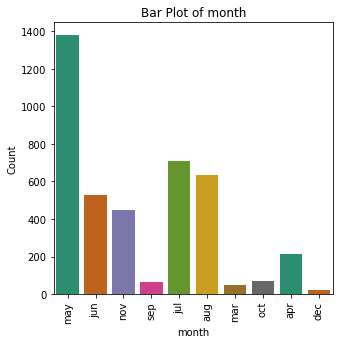

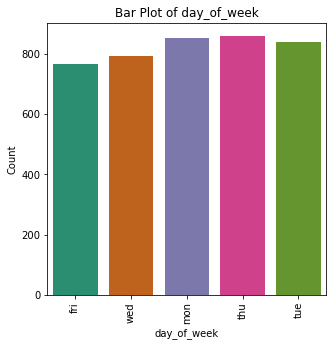

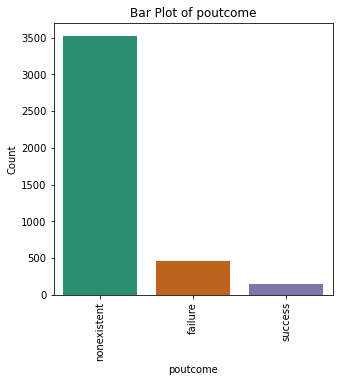

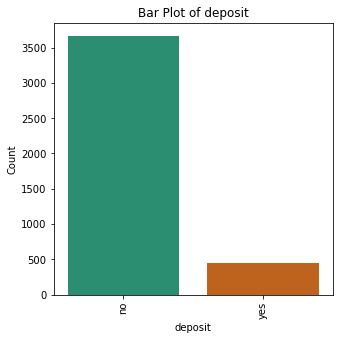

In [32]:
#Visualizing Categorical columns using Barplot
for feature in categorical_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, data=data, palette='Dark2')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

## Splitting Data

In [33]:
X = data.drop('deposit', axis=1)
y = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [34]:
# Define categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

## Decision Tree Classifier

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Define numeric and categorical features
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the entire dataset
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [37]:
# Initializing the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8859223300970874
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       732
           1       0.49      0.46      0.47        92

    accuracy                           0.89       824
   macro avg       0.71      0.70      0.70       824
weighted avg       0.88      0.89      0.88       824

[[688  44]
 [ 50  42]]


In [39]:
feature_importance = dt_classifier.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
age: 0.09566668314991127
job: 0.28482198657592606
marital: 0.031843638099299555
education: 0.0
default: 0.0
housing: 0.0
loan: 0.01137050184820207
contact: 0.039292532848417196
month: 0.05125904881200053
day_of_week: 0.16186232021198957
duration: 0.016568408309488206
campaign: 0.004310249159986927
pdays: 0.0033378590027712414
previous: 0.0
poutcome: 0.005699633504598096
emp.var.rate: 0.011766244552290963
cons.price.idx: 0.0022741496778623522
cons.conf.idx: 0.004330799527385567
euribor3m: 0.003395307992143546
nr.employed: 0.011526746940251326


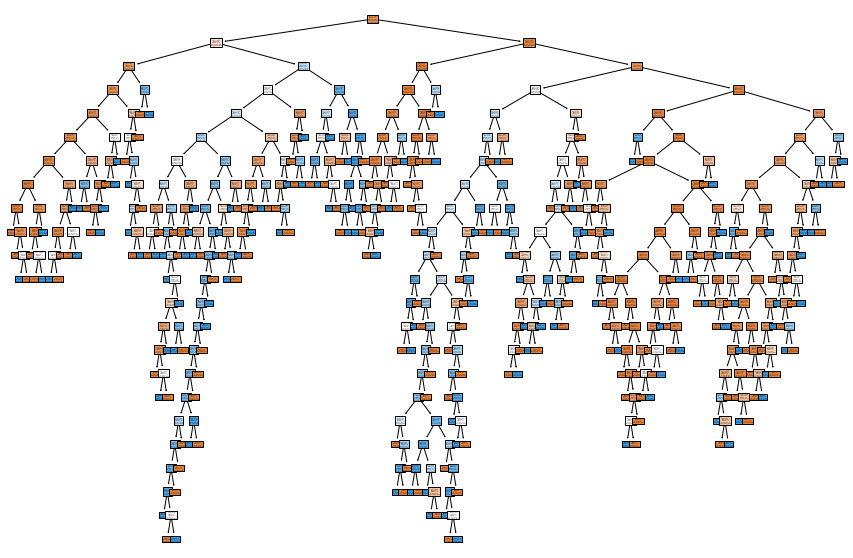

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, class_names=['No Purchase', 'Purchase'])
plt.show()